# Import libraries

In [1]:
import sys                                                  # Read system parameters.
import numpy as np                                          # Work with multi-dimensional arrays.
import pandas as pd                                         # Manipulate and analyze data.
import matplotlib                                           # Create and format charts.
import matplotlib.pyplot as plt
import category_encoders as ce                              # Encode data.
import sklearn                                              # Train and evaluate machine learning models.
from sklearn.model_selection import train_test_split, \
                                    learning_curve, \
                                    RandomizedSearchCV, \
                                    GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, \
                            confusion_matrix, \
                            f1_score, \
                            recall_score, \
                            precision_score, \
                            RocCurveDisplay, \
                            PrecisionRecallDisplay, \
                            ConfusionMatrixDisplay
from sklearn.dummy import DummyClassifier
import xgboost                                              # Build gradient boosting models.
from xgboost import XGBClassifier
import imblearn                                             # Deal with imbalanced data.
from imblearn.over_sampling import SMOTE                    # Perform oversampling.
from collections import Counter                             # Count objects in containers.
import pickle                                               # Save Python objects as binary files.
import warnings                                             # Suppress warnings.
warnings.filterwarnings('ignore')

# Ensure results are reproducible.
np.random.seed(1)

# Summarize software libraries used.
print('Libraries used in this project:')
print('- Python {}'.format(sys.version))
print('- NumPy {}'.format(np.__version__))
print('- pandas {}'.format(pd.__version__))
print('- Matplotlib {}'.format(matplotlib.__version__))
print('- Category Encoders {}'.format(ce.__version__))
print('- scikit-learn {}'.format(sklearn.__version__))
print('- XGBoost {}'.format(xgboost.__version__))
print('- imbalanced-learn {}\n'.format(imblearn.__version__))

Libraries used in this project:
- Python 3.12.6 (tags/v3.12.6:a4a2d2b, Sep  6 2024, 20:11:23) [MSC v.1940 64 bit (AMD64)]
- NumPy 2.1.1
- pandas 2.2.3
- Matplotlib 3.9.2
- Category Encoders 2.8.0
- scikit-learn 1.6.1
- XGBoost 3.0.1
- imbalanced-learn 0.13.0



# Load and preview the data

In [2]:
Classification_data = pd.read_pickle('Data_Cleaned_2.pickle')

Classification_data.head(n = 100)

,PAGE_NO,TOTAL_ANNOTATION,DEVICE_NAME,CREATED_DATE,PROCESS_STAGE,BROWSER_VERSION,BROWSER_NAME,CATEGORY_ERROR,YEAR,TIME_BIN,IS_WEEKEND,MONTH
0,1,1,Desktop,2023-10-29 09:47:00,Passing Parameter,118.0.0.0,Chrome,PassingParam,2023,Morning,True,10
1,1,1,Desktop,2023-10-29 09:54:00,Passing Parameter,116.0.0.0,Chrome,PassingParam,2023,Morning,True,10
2,3,1,Desktop,2023-10-29 22:19:00,Passing Parameter,118.0.0.0,Chrome,PassingParam,2023,night,True,10
3,3,1,Desktop,2023-10-30 00:11:00,Passing Parameter,118.0.0.0,Chrome,PassingParam,2023,night,False,10
4,1,1,Desktop,2023-10-30 08:11:00,Passing Parameter,118.0.0.0,Chrome,PassingParam,2023,Morning,False,10
...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,1,Desktop,2023-11-08 09:14:00,Passing Parameter,118.0.0.0,Chrome,PassingParam,2023,Morning,False,11
96,5,1,Desktop,2023-11-08 10:55:00,Passing Parameter,115.0.0.0,Firefox,PassingParam,2023,Morning,False,11
97,5,1,Desktop,2023-11-08 11:06:00,Passing Parameter,119.0.0.0,Firefox,PassingParam,2023,Morning,False,11
98,4,1,Desktop,2023-11-08 11:39:00,Passing Parameter,119.0.0.0,Chrome,PassingParam,2023,Morning,False,11


In [3]:
#Check the shape of the data
Classification_data.shape

(671, 12)

In [4]:
#Check the data types
Classification_data.dtypes

PAGE_NO                      int64
TOTAL_ANNOTATION             int64
DEVICE_NAME         string[python]
CREATED_DATE        datetime64[ns]
PROCESS_STAGE       string[python]
BROWSER_VERSION             object
BROWSER_NAME                object
CATEGORY_ERROR              object
YEAR                         int32
TIME_BIN                    object
IS_WEEKEND                    bool
MONTH                        int32
dtype: object

# Study Feature

1) CREATED_DATE - The date and time when the issue occurred.

2) BROWSER_NAME - The name of the browser used (e.g., Chrome, Firefox).

3) BROWSER_VERSION - The version number of the browser (e.g., Chrome 119.0.0.0, Firefox 118.0.0.0).

4) CATEGORY_ERROR	The type/category of the error encountered- extract from PROCESS_STAGE features.

5) IS_WEEKEND	Indicates whether the issue occurred on a weekend (True or False).

6) TIME_BIN	The time of day grouped into categories (e.g., Morning, Night).

7) MONTH	The month when the issue occurred (numeric format: 1–12).

8) YEAR	The year when the issue occurred (e.g., 2023).

9) DEVICE_NAME	The type of device used (e.g., Desktop, Mobile).

10) PROCESS_STAGE	The current stage of the system or process where the error occurred.The Features is the detail error.

11) Features for Numeric only - PAGE_NO,TOTAL_ANNOTATION,YEAR,TIME_BIN(if we can change to one hot encoding),IS_WEEKEND(if we can change to one hot encoding),MONTH

22) Features for Category only - DEVICE_NAME,BROWSER_NAME,BROWSER_VERSION,CATEGORY_ERROR

# Objective

1) The dataset have multi-Class, issues,one hot encoding categorical variables.
2) Set Features and Target Features
3) Choose features CATEGORY_ERROR(CATEGORY_ERROR_PassingParam) because this label is more dominant in dataset.
4) Model Classification will be Logistic Regression,K-NN Model, SVM Model,Naive Bayes, Decision Tree, Random Forest, and Gradient Boosting.
5) Remove features not using anymore
6) Build a model Classificatioon to Predict category of the CATEGORY_ERROR(CATEGORY_ERROR_PassingParam) that will be happen
7) Train and Test
8) Evaluate The Model
9) Compare evaluation each model
10) Plot Confusion Metrix
11) Plot ROC curve and Precision-recall curve
12) Plot Feature Important
13) Plot Learning curve
14) For Learning Purposes


# PreProcessing Data

In [5]:
Classification_data = Classification_data.drop(columns=["CREATED_DATE","PROCESS_STAGE"])

In [6]:
#change IS_WEEKEND ke 0/1
Classification_data["IS_WEEKEND"] = Classification_data["IS_WEEKEND"].astype(int)


In [7]:
#one hot encoding categorical variables
Classification_data = pd.get_dummies(Classification_data, drop_first=True)

In [8]:

Classification_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671 entries, 0 to 670
Data columns (total 43 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   PAGE_NO                                      671 non-null    int64  
 1   TOTAL_ANNOTATION                             671 non-null    int64  
 2   YEAR                                         671 non-null    int32  
 3   IS_WEEKEND                                   671 non-null    int64  
 4   MONTH                                        671 non-null    int32  
 5   DEVICE_NAME_Mobile                           671 non-null    boolean
 6   BROWSER_VERSION_111.0.0.0                    671 non-null    bool   
 7   BROWSER_VERSION_114.0.0.0                    671 non-null    bool   
 8   BROWSER_VERSION_115.0.0.0                    671 non-null    bool   
 9   BROWSER_VERSION_116.0.0.0                    671 non-null    bool   
 10  BR

In [ ]:
#Write the new DataFrame as a pickle file
Classification_data.to_pickle('Data_cleaned_3.pickle')

# 1)Target Feature

In [85]:
# 1)  Choose features CATEGORY_ERROR(CATEGORY_ERROR_PassingParam) because this label is more dominant in dataset
Classification_data.CATEGORY_ERROR_PassingParam.value_counts()

CATEGORY_ERROR_PassingParam
True     571
False    100
Name: count, dtype: int64

In [86]:
# Explore the distribution of the target variable
Classification_data.CATEGORY_ERROR_PassingParam.value_counts(normalize = True)

CATEGORY_ERROR_PassingParam
True     0.850969
False    0.149031
Name: proportion, dtype: float64

In [87]:
#Split the data into target and features
target_data = Classification_data.CATEGORY_ERROR_PassingParam 
features = Classification_data.drop(['CATEGORY_ERROR_PassingParam'],
                                         axis = 1)

In [88]:
target_data.info()

<class 'pandas.core.series.Series'>
RangeIndex: 671 entries, 0 to 670
Series name: CATEGORY_ERROR_PassingParam
Non-Null Count  Dtype
--------------  -----
671 non-null    bool 
dtypes: bool(1)
memory usage: 803.0 bytes


In [89]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671 entries, 0 to 670
Data columns (total 42 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   PAGE_NO                                      671 non-null    int64  
 1   TOTAL_ANNOTATION                             671 non-null    int64  
 2   YEAR                                         671 non-null    int32  
 3   IS_WEEKEND                                   671 non-null    int64  
 4   MONTH                                        671 non-null    int32  
 5   DEVICE_NAME_Mobile                           671 non-null    boolean
 6   BROWSER_VERSION_111.0.0.0                    671 non-null    bool   
 7   BROWSER_VERSION_114.0.0.0                    671 non-null    bool   
 8   BROWSER_VERSION_115.0.0.0                    671 non-null    bool   
 9   BROWSER_VERSION_116.0.0.0                    671 non-null    bool   
 10  BR

In [90]:
# Split the data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    target_data,
                                                    test_size = 0.3)

In [91]:
print('Training-data features: ', X_train.shape)
print('Training-data target:   ', y_train.shape)

Training-data features:  (469, 42)
Training-data target:    (469,)


In [92]:
# Apply oversampling to the data

print('Before oversampling: ', Counter(y_train))

Before oversampling:  Counter({True: 408, False: 61})


In [93]:
# Define oversampling strategy.

SMOTE = SMOTE()

# Fit and apply the transform.

X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train, y_train)
X_train_SMOTE = pd.DataFrame(X_train_SMOTE,
                             columns = X_train.columns)

print('After oversampling: ', Counter(y_train_SMOTE))

After oversampling:  Counter({True: 408, False: 408})


In [94]:
#Check the distribution of the test data

# Test data should not be oversampled.

print('Test-data features: ', X_test.shape)
print('Test-data target:   ', y_test.shape)

Test-data features:  (202, 42)
Test-data target:    (202,)


In [95]:
Counter(y_test)

Counter({True: 163, False: 39})

In [96]:
# Normalize the data

norm = MinMaxScaler().fit(X_train_SMOTE)

In [97]:
X_train_norm = norm.transform(X_train_SMOTE)

print('Minimum: ', np.min(X_train_norm))
print('Maximum: ', np.max(X_train_norm))

Minimum:  0.0
Maximum:  1.0000000000000002


# 2) Traning Model

# logistic regression model

In [98]:
# Train a logistic regression model

logreg = LogisticRegression()
logreg.fit(X_train_norm, y_train_SMOTE)

LogisticRegression()

In [99]:
# Make predictions using the logistic regression model

logreg_y_pred = logreg.predict(X_test) 
print(Counter(logreg_y_pred))

Counter({np.False_: 202})


In [100]:
results_logistic = pd.concat([y_test.iloc[:5], X_test.iloc[:5]], axis = 1)
results_logistic.insert(1, 'Error_PassingParam_pred', logreg_y_pred[:5])
results_logistic

,CATEGORY_ERROR_PassingParam,Error_PassingParam_pred,PAGE_NO,TOTAL_ANNOTATION,YEAR,IS_WEEKEND,MONTH,DEVICE_NAME_Mobile,BROWSER_VERSION_111.0.0.0,BROWSER_VERSION_114.0.0.0,...,BROWSER_NAME_Safari,CATEGORY_ERROR_DocEditor_ConnectionTimeout,CATEGORY_ERROR_DocEditor_DbUpdateErrEntries,CATEGORY_ERROR_DocEditor_ProviderFailed,CATEGORY_ERROR_DocEditor_ReceiveError,CATEGORY_ERROR_DocEditor_connection_closed,CATEGORY_ERROR_Other,TIME_BIN_Evening,TIME_BIN_Morning,TIME_BIN_night
107,True,False,1,1,2023,0,11,False,False,False,...,False,False,False,False,False,False,False,False,True,False
422,True,False,2,4,2024,0,7,False,False,False,...,False,False,False,False,False,False,False,False,True,False
111,True,False,1,1,2023,0,11,False,False,False,...,False,False,False,False,False,False,False,False,True,False
544,True,False,1,3,2024,0,12,False,False,False,...,False,False,False,False,False,False,False,False,True,False
59,True,False,2,1,2023,0,11,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [101]:
# Obtain the logistic regression model's score
accuracy_score(y_test, logreg_y_pred)

0.19306930693069307

In [102]:
print('Number of mislabeled points out of a total %d points: %d'
       % (X_test.shape[0], (y_test != logreg_y_pred).sum()))

Number of mislabeled points out of a total 202 points: 163


# (k-NN) model

In [103]:
# Train a k-nearest neighbor (k-NN) model

knn = KNeighborsClassifier()
knn.fit(X_train_norm, y_train_SMOTE)

KNeighborsClassifier()

In [104]:
# Make predictions using the k-NN model
knn_y_pred = knn.predict(X_test.values)
print(Counter(knn_y_pred))

Counter({np.True_: 113, np.False_: 89})


In [105]:
results_knn = pd.concat([y_test.iloc[:5], X_test.iloc[:5]], axis = 1)
results_knn.insert(1, 'Error_PassingParam_pred', knn_y_pred[:5])
results_knn

,CATEGORY_ERROR_PassingParam,Error_PassingParam_pred,PAGE_NO,TOTAL_ANNOTATION,YEAR,IS_WEEKEND,MONTH,DEVICE_NAME_Mobile,BROWSER_VERSION_111.0.0.0,BROWSER_VERSION_114.0.0.0,...,BROWSER_NAME_Safari,CATEGORY_ERROR_DocEditor_ConnectionTimeout,CATEGORY_ERROR_DocEditor_DbUpdateErrEntries,CATEGORY_ERROR_DocEditor_ProviderFailed,CATEGORY_ERROR_DocEditor_ReceiveError,CATEGORY_ERROR_DocEditor_connection_closed,CATEGORY_ERROR_Other,TIME_BIN_Evening,TIME_BIN_Morning,TIME_BIN_night
107,True,True,1,1,2023,0,11,False,False,False,...,False,False,False,False,False,False,False,False,True,False
422,True,False,2,4,2024,0,7,False,False,False,...,False,False,False,False,False,False,False,False,True,False
111,True,True,1,1,2023,0,11,False,False,False,...,False,False,False,False,False,False,False,False,True,False
544,True,False,1,3,2024,0,12,False,False,False,...,False,False,False,False,False,False,False,False,True,False
59,True,True,2,1,2023,0,11,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [106]:
# Obtain the k-NN model's score
accuracy_score(y_test, knn_y_pred)

0.6732673267326733

In [107]:
print('Number of mislabeled points out of a total %d points: %d'
       % (X_test.shape[0], (y_test != knn_y_pred).sum()))

Number of mislabeled points out of a total 202 points: 66


# (SVM) model

In [108]:
# Train a support-vector machine (SVM) model

svm = SVC()
svm.fit(X_train_norm, y_train_SMOTE)

SVC()

In [109]:
svm_y_pred = svm.predict(X_test)
print(Counter(svm_y_pred))

Counter({np.False_: 202})


In [110]:
results_svm = pd.concat([y_test.iloc[:5], X_test.iloc[:5]], axis = 1)
results_svm.insert(1, 'Error_PassingParam_pred', svm_y_pred[:5])
results_svm

,CATEGORY_ERROR_PassingParam,Error_PassingParam_pred,PAGE_NO,TOTAL_ANNOTATION,YEAR,IS_WEEKEND,MONTH,DEVICE_NAME_Mobile,BROWSER_VERSION_111.0.0.0,BROWSER_VERSION_114.0.0.0,...,BROWSER_NAME_Safari,CATEGORY_ERROR_DocEditor_ConnectionTimeout,CATEGORY_ERROR_DocEditor_DbUpdateErrEntries,CATEGORY_ERROR_DocEditor_ProviderFailed,CATEGORY_ERROR_DocEditor_ReceiveError,CATEGORY_ERROR_DocEditor_connection_closed,CATEGORY_ERROR_Other,TIME_BIN_Evening,TIME_BIN_Morning,TIME_BIN_night
107,True,False,1,1,2023,0,11,False,False,False,...,False,False,False,False,False,False,False,False,True,False
422,True,False,2,4,2024,0,7,False,False,False,...,False,False,False,False,False,False,False,False,True,False
111,True,False,1,1,2023,0,11,False,False,False,...,False,False,False,False,False,False,False,False,True,False
544,True,False,1,3,2024,0,12,False,False,False,...,False,False,False,False,False,False,False,False,True,False
59,True,False,2,1,2023,0,11,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [111]:
# Obtain the SVM model's score

accuracy_score(y_test, svm_y_pred)

0.19306930693069307

In [112]:
print('Number of mislabeled points out of a total %d points: %d'
       % (X_test.shape[0], (y_test != svm_y_pred).sum()))

Number of mislabeled points out of a total 202 points: 163


# naïve Bayes model

In [113]:
# Train a naïve Bayes model
gnb = GaussianNB()
gnb.fit(X_train_SMOTE, y_train_SMOTE)

GaussianNB()

In [114]:
# Make predictions using the naïve Bayes model

gnb_y_pred = gnb.predict(X_test)
print(Counter(gnb_y_pred))

Counter({np.True_: 135, np.False_: 67})


In [115]:
results_gnb = pd.concat([y_test.iloc[:5], X_test.iloc[:5]], axis = 1)
results_gnb.insert(1, 'Error_PassingParam_pred', gnb_y_pred[:5])
results_gnb

,CATEGORY_ERROR_PassingParam,Error_PassingParam_pred,PAGE_NO,TOTAL_ANNOTATION,YEAR,IS_WEEKEND,MONTH,DEVICE_NAME_Mobile,BROWSER_VERSION_111.0.0.0,BROWSER_VERSION_114.0.0.0,...,BROWSER_NAME_Safari,CATEGORY_ERROR_DocEditor_ConnectionTimeout,CATEGORY_ERROR_DocEditor_DbUpdateErrEntries,CATEGORY_ERROR_DocEditor_ProviderFailed,CATEGORY_ERROR_DocEditor_ReceiveError,CATEGORY_ERROR_DocEditor_connection_closed,CATEGORY_ERROR_Other,TIME_BIN_Evening,TIME_BIN_Morning,TIME_BIN_night
107,True,True,1,1,2023,0,11,False,False,False,...,False,False,False,False,False,False,False,False,True,False
422,True,False,2,4,2024,0,7,False,False,False,...,False,False,False,False,False,False,False,False,True,False
111,True,True,1,1,2023,0,11,False,False,False,...,False,False,False,False,False,False,False,False,True,False
544,True,False,1,3,2024,0,12,False,False,False,...,False,False,False,False,False,False,False,False,True,False
59,True,True,2,1,2023,0,11,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [116]:
# Obtain the naïve Bayes model's score

accuracy_score(y_test, gnb_y_pred)

0.8613861386138614

In [117]:
print('Number of mislabeled points out of a total %d points: %d'
       % (X_test.shape[0], (y_test != gnb_y_pred).sum()))

Number of mislabeled points out of a total 202 points: 28


# decision-tree model

In [118]:
# Train a decision-tree model

clf_tree = DecisionTreeClassifier()
clf_tree.fit(X_train_SMOTE, y_train_SMOTE)

DecisionTreeClassifier()

In [119]:
# Make predictions using the decision-tree model

clf_tree_y_pred = clf_tree.predict(X_test)
print(Counter(clf_tree_y_pred))

Counter({np.True_: 165, np.False_: 37})


In [120]:
results_DecisionTree = pd.concat([y_test.iloc[:5], X_test.iloc[:5]], axis = 1)
results_DecisionTree.insert(1, 'Error_PassingParam_pred', clf_tree_y_pred[:5])
results_DecisionTree

,CATEGORY_ERROR_PassingParam,Error_PassingParam_pred,PAGE_NO,TOTAL_ANNOTATION,YEAR,IS_WEEKEND,MONTH,DEVICE_NAME_Mobile,BROWSER_VERSION_111.0.0.0,BROWSER_VERSION_114.0.0.0,...,BROWSER_NAME_Safari,CATEGORY_ERROR_DocEditor_ConnectionTimeout,CATEGORY_ERROR_DocEditor_DbUpdateErrEntries,CATEGORY_ERROR_DocEditor_ProviderFailed,CATEGORY_ERROR_DocEditor_ReceiveError,CATEGORY_ERROR_DocEditor_connection_closed,CATEGORY_ERROR_Other,TIME_BIN_Evening,TIME_BIN_Morning,TIME_BIN_night
107,True,True,1,1,2023,0,11,False,False,False,...,False,False,False,False,False,False,False,False,True,False
422,True,True,2,4,2024,0,7,False,False,False,...,False,False,False,False,False,False,False,False,True,False
111,True,True,1,1,2023,0,11,False,False,False,...,False,False,False,False,False,False,False,False,True,False
544,True,True,1,3,2024,0,12,False,False,False,...,False,False,False,False,False,False,False,False,True,False
59,True,True,2,1,2023,0,11,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [121]:
# Obtain the decision-tree model's score
accuracy_score(y_test, clf_tree_y_pred)

0.9900990099009901

In [122]:
print('Number of mislabeled points out of a total %d points: %d'
       % (X_test.shape[0], (y_test != clf_tree_y_pred).sum()))

Number of mislabeled points out of a total 202 points: 2


In [123]:
# Visualize the decision tree

text_representation = tree.export_text(clf_tree)
print(text_representation)

|--- feature_2 <= 2023.50
|   |--- class: True
|--- feature_2 >  2023.50
|   |--- feature_5 <= 0.50
|   |   |--- feature_3 <= 0.50
|   |   |   |--- feature_15 <= 0.50
|   |   |   |   |--- feature_12 <= 0.50
|   |   |   |   |   |--- feature_14 <= 0.50
|   |   |   |   |   |   |--- feature_8 <= 0.50
|   |   |   |   |   |   |   |--- feature_33 <= 0.50
|   |   |   |   |   |   |   |   |--- feature_38 <= 0.50
|   |   |   |   |   |   |   |   |   |--- feature_34 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- feature_36 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 7
|   |   |   |   |   |   |   |   |   |   |--- feature_36 >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: False
|   |   |   |   |   |   |   |   |   |--- feature_34 >  0.50
|   |   |   |   |   |   |   |   |   |   |--- class: False
|   |   |   |   |   |   |   |   |--- feature_38 >  0.50
|   |   |   |   |   |   |   |   |   |--- class: False
|   |   |   |   |   |   |   |--- featur

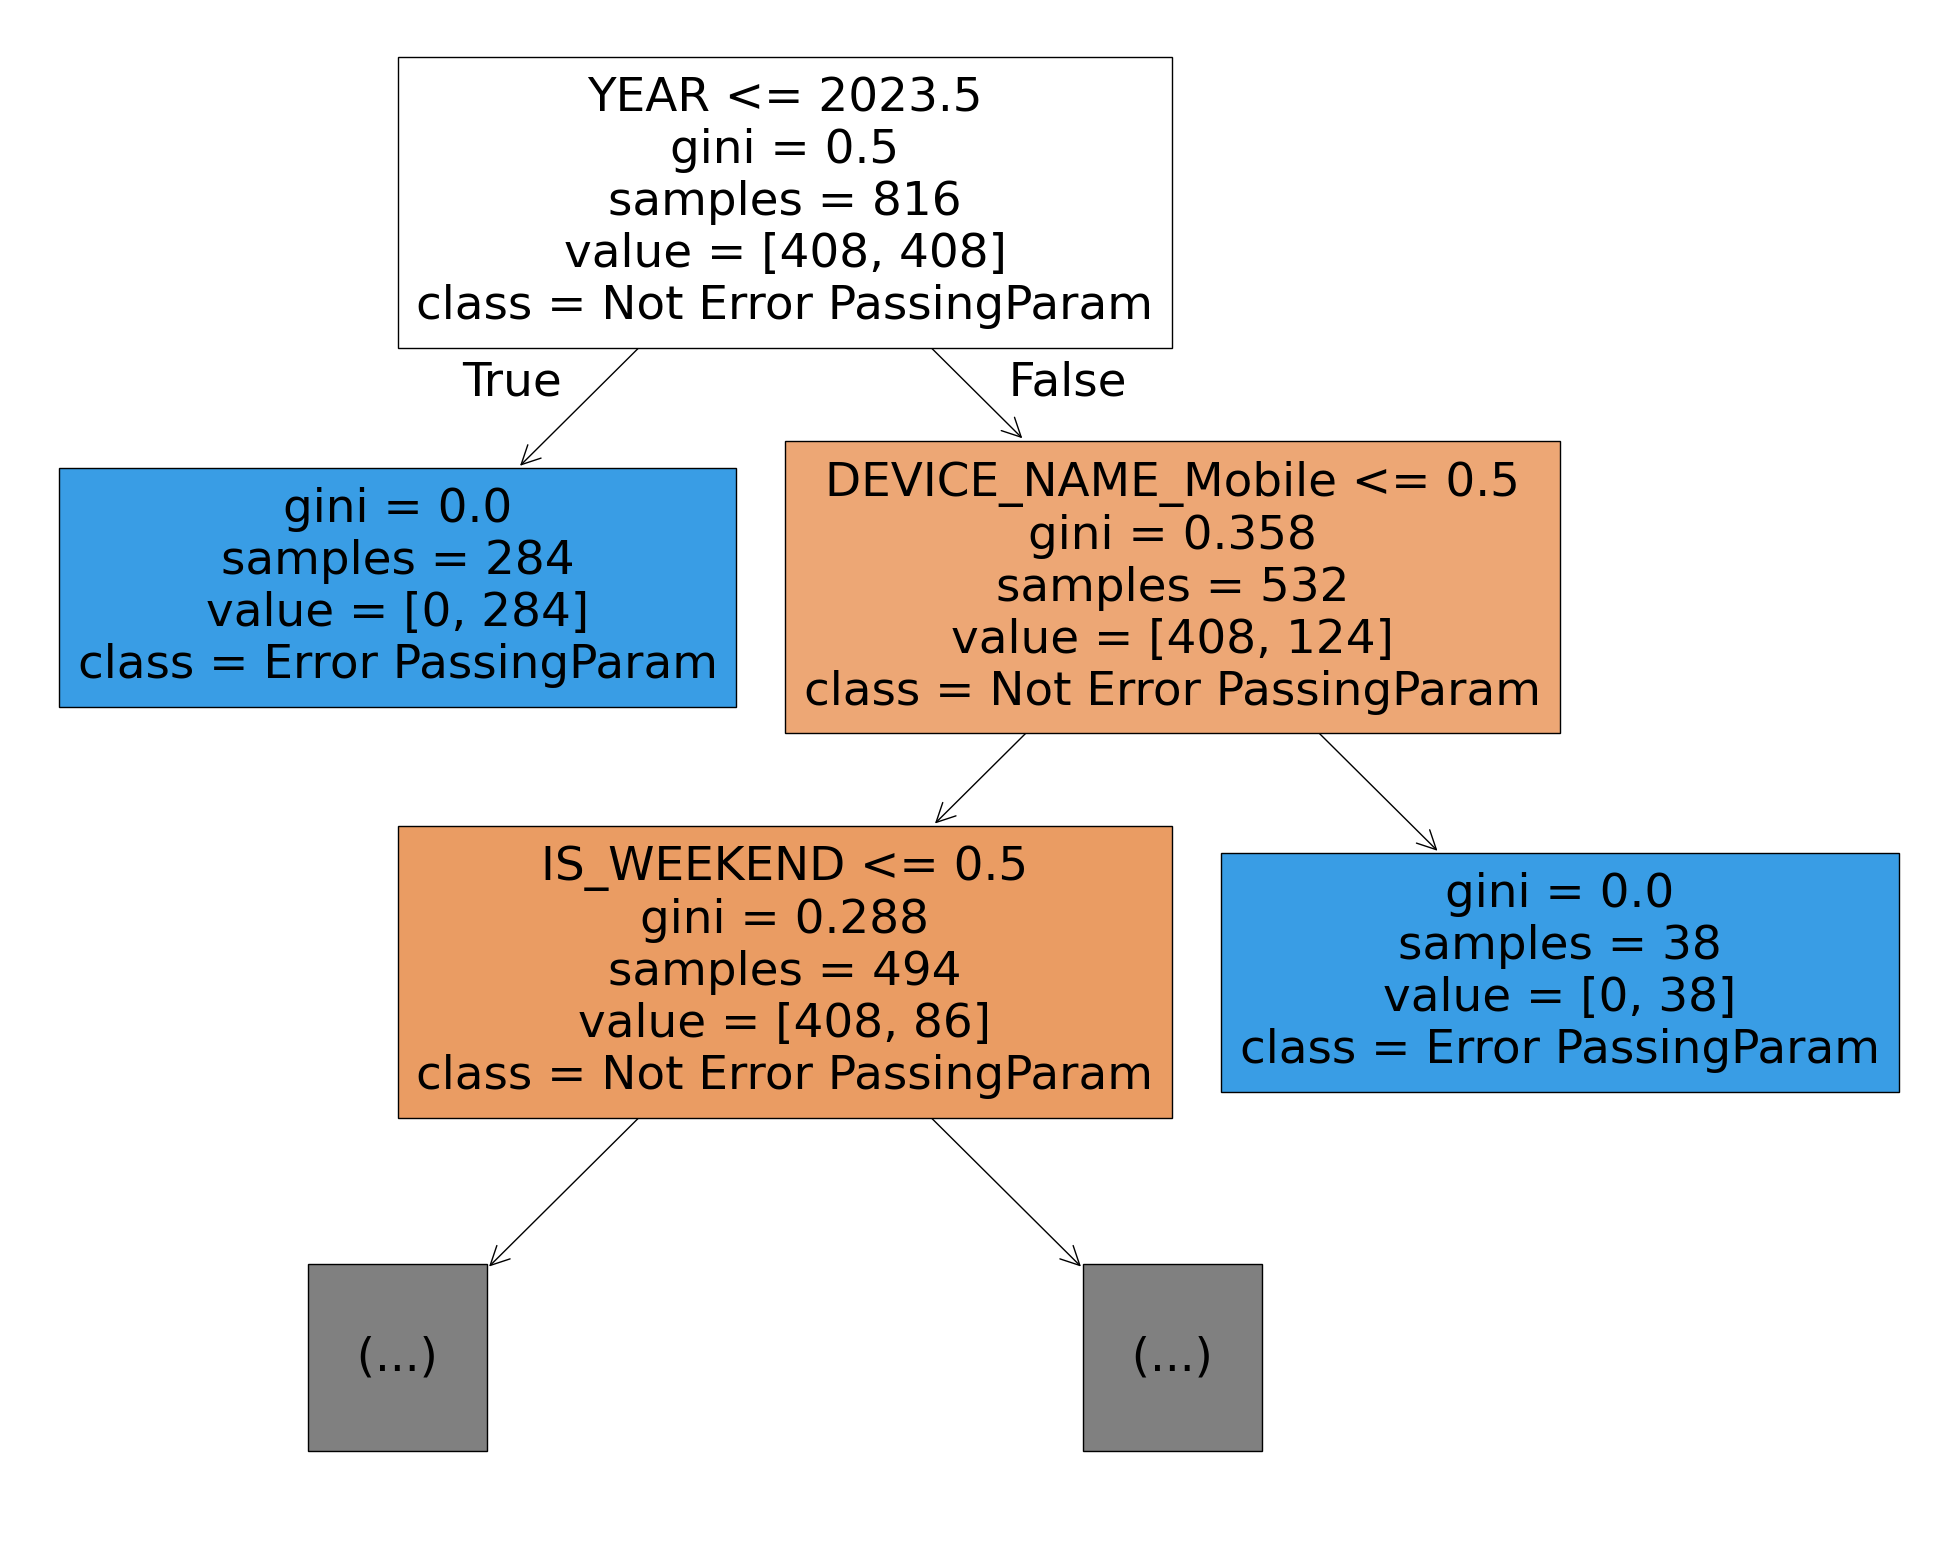

In [124]:
fig = plt.figure(figsize = (25, 20))
_ = tree.plot_tree(clf_tree, 
                   feature_names = list(X_train.columns),  
                   class_names = ['Not Error PassingParam', 'Error PassingParam'],
                   max_depth = 2,
                   filled = True)

# random-forest model

In [125]:
# Train a random-forest model

rf = RandomForestClassifier()
rf.fit(X_train_SMOTE, y_train_SMOTE)

RandomForestClassifier()

In [126]:
# Make predictions using the random-forest model

rf_y_pred = rf.predict(X_test)
print(Counter(rf_y_pred))

Counter({np.True_: 164, np.False_: 38})


In [127]:
results_rf = pd.concat([y_test.iloc[:5], X_test.iloc[:5]], axis = 1)
results_rf.insert(1, 'Error_PassingParam_pred', rf_y_pred[:5])
results_rf

,CATEGORY_ERROR_PassingParam,Error_PassingParam_pred,PAGE_NO,TOTAL_ANNOTATION,YEAR,IS_WEEKEND,MONTH,DEVICE_NAME_Mobile,BROWSER_VERSION_111.0.0.0,BROWSER_VERSION_114.0.0.0,...,BROWSER_NAME_Safari,CATEGORY_ERROR_DocEditor_ConnectionTimeout,CATEGORY_ERROR_DocEditor_DbUpdateErrEntries,CATEGORY_ERROR_DocEditor_ProviderFailed,CATEGORY_ERROR_DocEditor_ReceiveError,CATEGORY_ERROR_DocEditor_connection_closed,CATEGORY_ERROR_Other,TIME_BIN_Evening,TIME_BIN_Morning,TIME_BIN_night
107,True,True,1,1,2023,0,11,False,False,False,...,False,False,False,False,False,False,False,False,True,False
422,True,True,2,4,2024,0,7,False,False,False,...,False,False,False,False,False,False,False,False,True,False
111,True,True,1,1,2023,0,11,False,False,False,...,False,False,False,False,False,False,False,False,True,False
544,True,True,1,3,2024,0,12,False,False,False,...,False,False,False,False,False,False,False,False,True,False
59,True,True,2,1,2023,0,11,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [128]:
# Obtain the random-forest model's score

accuracy_score(y_test, rf_y_pred)

0.995049504950495

In [129]:
print('Number of mislabeled points out of a total %d points: %d'
       % (X_test.shape[0], (y_test != rf_y_pred).sum()))

Number of mislabeled points out of a total 202 points: 1


# gradient-boosting model

In [130]:
# Train a gradient-boosting model

xgb = XGBClassifier()
xgb.fit(X_train_SMOTE, y_train_SMOTE)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [131]:
# Make predictions using the gradient-boosting model
xgb_y_pred = xgb.predict(X_test)
print(Counter(xgb_y_pred))

Counter({np.int64(1): 164, np.int64(0): 38})


In [132]:
results_xgb = pd.concat([y_test.iloc[:5], X_test.iloc[:5]], axis = 1)
results_xgb.insert(1, 'Error_PassingParam_pred', xgb_y_pred[:5])
results_xgb

,CATEGORY_ERROR_PassingParam,Error_PassingParam_pred,PAGE_NO,TOTAL_ANNOTATION,YEAR,IS_WEEKEND,MONTH,DEVICE_NAME_Mobile,BROWSER_VERSION_111.0.0.0,BROWSER_VERSION_114.0.0.0,...,BROWSER_NAME_Safari,CATEGORY_ERROR_DocEditor_ConnectionTimeout,CATEGORY_ERROR_DocEditor_DbUpdateErrEntries,CATEGORY_ERROR_DocEditor_ProviderFailed,CATEGORY_ERROR_DocEditor_ReceiveError,CATEGORY_ERROR_DocEditor_connection_closed,CATEGORY_ERROR_Other,TIME_BIN_Evening,TIME_BIN_Morning,TIME_BIN_night
107,True,1,1,1,2023,0,11,False,False,False,...,False,False,False,False,False,False,False,False,True,False
422,True,1,2,4,2024,0,7,False,False,False,...,False,False,False,False,False,False,False,False,True,False
111,True,1,1,1,2023,0,11,False,False,False,...,False,False,False,False,False,False,False,False,True,False
544,True,1,1,3,2024,0,12,False,False,False,...,False,False,False,False,False,False,False,False,True,False
59,True,1,2,1,2023,0,11,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [133]:
# Obtain the random-forest model's score

accuracy_score(y_test, xgb_y_pred)

0.995049504950495

In [134]:
print('Number of mislabeled points out of a total %d points: %d'
       % (X_test.shape[0], (y_test != xgb_y_pred).sum()))

Number of mislabeled points out of a total 202 points: 1


# 3) Tuning

In [135]:
# Define the parameter grid used to tune the logistic regression model

solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [10, 1.0, 0.1, 0.01]

param_grid = dict(solver = solvers, penalty = penalty, C = c_values)

print(param_grid)

{'solver': ['newton-cg', 'lbfgs', 'liblinear'], 'penalty': ['l2'], 'C': [10, 1.0, 0.1, 0.01]}


In [136]:
# Perform a randomized search for optimal hyperparameters

model_LG = LogisticRegression()
random_search_LG = RandomizedSearchCV(estimator = model_LG,
                                   param_distributions = param_grid)
random_search_LG.fit(X_train_norm, y_train_SMOTE)

RandomizedSearchCV(estimator=LogisticRegression(),
                   param_distributions={'C': [10, 1.0, 0.1, 0.01],
                                        'penalty': ['l2'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear']})

In [137]:
# Summarize the results of the randomized search.

print('Best accuracy score:', round(random_search_LG.best_score_, 4))
print('Best parameters:    ', random_search_LG.best_params_)

Best accuracy score: 0.9963
Best parameters:     {'solver': 'lbfgs', 'penalty': 'l2', 'C': 10}


In [138]:
# Perform a grid search for optimal hyperparameters

model_LG_GS = LogisticRegression()
grid_search_LG_GS = GridSearchCV(estimator = model_LG_GS,
                           param_grid = param_grid)
logreg_fit = grid_search_LG_GS.fit(X_train_norm, y_train_SMOTE)

In [139]:
# Summarize the results of the grid search.

print('Best accuracy score:', round(grid_search_LG_GS.best_score_, 4))
print('Best parameters:    ', grid_search_LG_GS.best_params_)

Best accuracy score: 0.9963
Best parameters:     {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}


In [140]:
# Tune the gradient-boosting model to reduce overfitting

model_XGB = XGBClassifier()

param_grid = {
    'n_estimators': [10],
    'max_depth': [15, 20, 25],
    'reg_alpha': [1.1, 1.2, 1.3],
    'reg_lambda': [1.1, 1.2, 1.3]
}

In [141]:
XGB_gs = GridSearchCV(estimator = model_XGB,
                  param_grid = param_grid, 
                  n_jobs = -1, 
                  scoring = 'accuracy',
                  verbose = 2)

fitted_model = XGB_gs.fit(X_train_SMOTE, y_train_SMOTE)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


In [142]:
print('Best accuracy score:', round(XGB_gs.best_score_, 4))
print('Best parameters:    ', XGB_gs.best_params_)

Best accuracy score: 0.9963
Best parameters:     {'max_depth': 15, 'n_estimators': 10, 'reg_alpha': 1.1, 'reg_lambda': 1.1}


# 4) Compare evaluation metrics for each model

In [143]:
models = ['Logistic Regression', 'Naïve Bayes', 'SVM', 'k-NN',
          'Decision Tree', 'Random Forest', 'XGBoost', 'Dummy Classifier']

metrics = ['Accuracy', 'Precision', 'Recall', 'F1']

pred_list = ['logreg_y_pred', 'gnb_y_pred', 'svm_y_pred', 'knn_y_pred',
             'clf_tree_y_pred','rf_y_pred', 'xgb_y_pred', 'dummy_y_pred']

# Baseline algorithm.
dummy = DummyClassifier(strategy = 'stratified')
dummy.fit(X_train_SMOTE, y_train_SMOTE)
dummy_y_pred = dummy.predict(X_test)

scores = np.empty((0, 4))

for i in pred_list:
    scores = np.append(scores,
                       np.array([[accuracy_score(y_test, globals()[i]),
                                  precision_score(y_test, globals()[i]),
                                  recall_score(y_test, globals()[i]),
                                  f1_score(y_test, globals()[i])]]),
                       axis = 0)

scores = np.around(scores, 4)

scoring_df = pd.DataFrame(scores, index = models, columns = metrics)
scoring_df.sort_values(by = 'F1', ascending = False)

,Accuracy,Precision,Recall,F1
XGBoost,0.9950,0.9939,1.0000,0.9969
Random Forest,0.9950,0.9939,1.0000,0.9969
Decision Tree,0.9901,0.9879,1.0000,0.9939
Naïve Bayes,0.8614,1.0000,0.8282,0.9060
k-NN,0.6733,0.9292,0.6442,0.7609
Dummy Classifier,0.4802,0.7959,0.4785,0.5977
SVM,0.1931,0.0000,0.0000,0.0000
Logistic Regression,0.1931,0.0000,0.0000,0.0000


# 5) Plot Confusion Matrix 

In [144]:
# Generate a confusion matrix
confusion_matrix(y_test, xgb_y_pred) 

array([[ 38,   1],
       [  0, 163]])

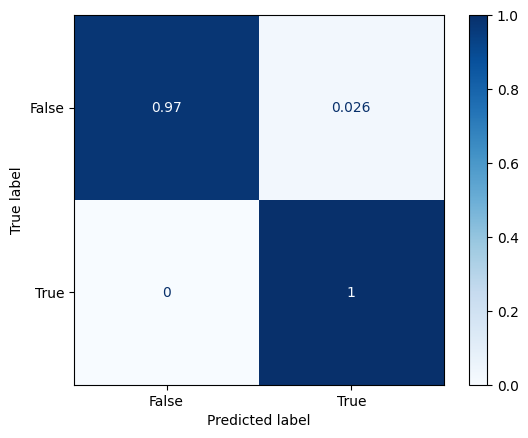

In [ ]:
ConfusionMatrixDisplay.from_estimator(xgb, 
                                      X_test, 
                                      y_test,
                                      cmap = plt.cm.Blues,
                                      normalize = 'true')

plt.show()

# 6) Plot ROC curve 

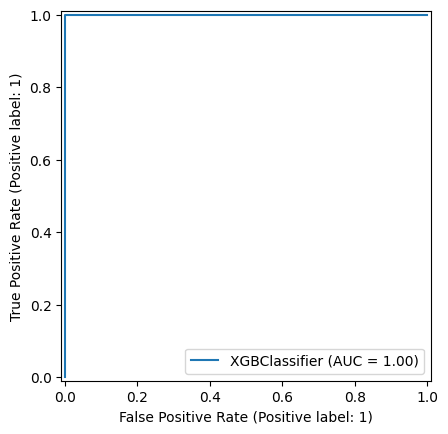

In [146]:
#Plot a ROC curve
RocCurveDisplay.from_estimator(xgb, X_test, y_test)  
plt.show()

# 7) Plot precision–recall curve 

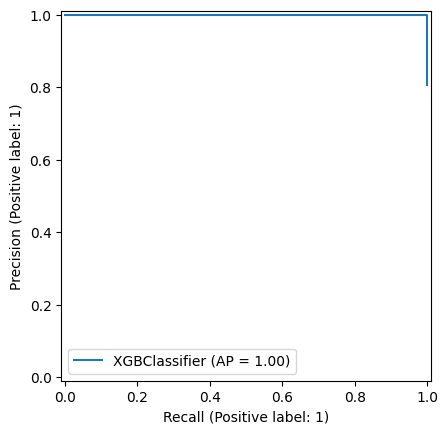

In [147]:
# Plot a precision–recall curve

PrecisionRecallDisplay.from_estimator(xgb, X_test, y_test)

plt.show();

# 8) Plot feature-importance 

In [148]:
# Generate a feature-importance plot
def feature_importance_plot(model, X_train, n):
    """Plots feature importance. Only works for ensemble learning."""
    plt.figure(figsize = (8, 5))
    feat_importances = pd.Series(model.feature_importances_,
                                 index = X_train.columns)
    feat_importances.nlargest(n).plot(kind = 'barh')
    plt.title(f'Top {n} Features')
    plt.show()

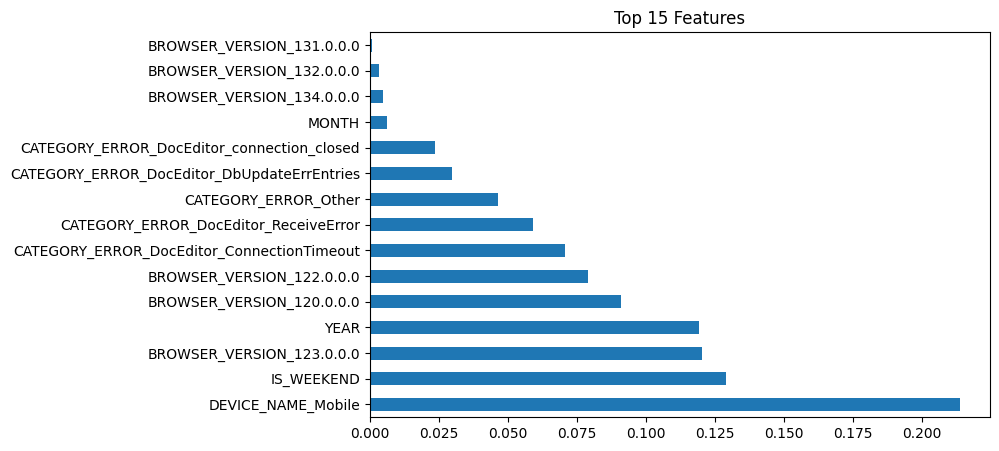

In [149]:
feature_importance_plot(xgb, X_train_SMOTE, 15)

# 9)Plot learning curves

In [150]:
# Plot learning curves
def plot_learning_curves(model, X_train, y_train):
    """Plots learning curves for model validation."""
    plt.figure(figsize = (5, 5))
    train_sizes, train_scores, test_scores = \
    learning_curve(model, X_train, y_train, cv = 5,
                   scoring = 'accuracy', n_jobs = -1,
                   shuffle = True,
                   train_sizes = np.linspace(0.01, 1.0, 5))
        
    # Means of training and test set scores.
    train_mean = np.mean(train_scores, axis = 1)
    test_mean = np.mean(test_scores, axis = 1)

    # Draw lines.
    plt.plot(train_sizes, train_mean, '--',
             color = '#111111', label = 'Training score')
    plt.plot(train_sizes, test_mean,
             color = '#111111', label = 'Cross-validation score')

    # Create plot.
    plt.title('Learning Curves')
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy Score')
    plt.legend(loc = 'best')
    plt.tight_layout()

    plt.show()

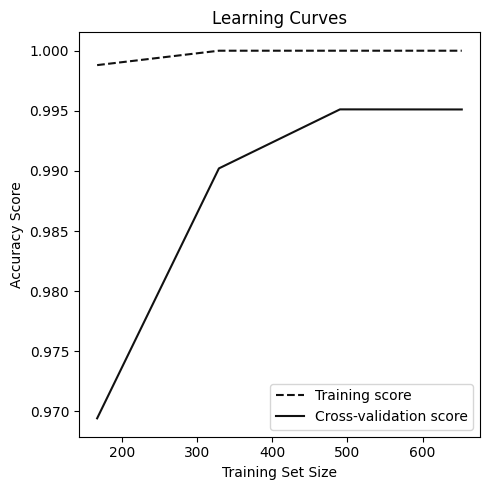

In [151]:
plot_learning_curves(xgb, X_train_SMOTE, y_train_SMOTE)

In [152]:
#Save the best model
pickle.dump(xgb, open('xgboost_classifier.pickle', 'wb'))

# 10) Conclusion


1) To Predict Clasification True/False from feature CATEGORY_ERROR_PassingParam.
2) The Distribution of CATEGORY_ERROR_PassingParam have the most true value. The data showing that have imbalance data. The majority is True value.
3) Applying the SMOTE to handle Imbalanced data.
4) Trainning data in 70% and Test is 30%
5) Evaluate Logistic Regression Model by Accuracy is 19%
6) Evaluate K-NN Model by Accuracy is 67%
7) Evaluate SVM Model by Accuracy is 19%
8) Evaluate Naive Bayes Model by Accuracy is 86%
9) Evaluate Decision Tree Model by Accuracy is 99%
10) Evaluate Random Forest Model by Accuracy is 99.5%
11) Evaluate Gradient Boosting Model by Accuracy is 99.5%
12) Tuning Logistic Regression with Randomized Search show accuracy is 99.6% with best parameters:   {'solver': 'lbfgs', 'penalty': 'l2', 'C': 10}
13) Tuning Logistic Regression with Grid Search show accuracy is 99.6% with best parameters:   {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
14) Tuning Gradient Boosting with Grid Search show accuracy is 99.6% with best parameters:   {'max_depth': 15, 'n_estimators': 10, 'reg_alpha': 1.1, 'reg_lambda': 1.1}
15) Compare Evaluation metrics for each model Dummy Regression, Logistic Regression, Naive Bayes,SVM, K-NN, Decision Tree,Random Forest,XGBoost
16) Used Dummy model (not using in real production) but used as benchmark.
17) The best model show the Gradient Boosting is better and following Random Forest,Decision Tree, Naive Bayes and K-NN. Below than Dummy Class, the model is not good enough.
18) The Model with Precision,Recall F1 score with near to 1 showing the model is very good in predict classification.
19) The Plot Features Important shows 15 top influence the target feature. The highest score is DEVICE_NAME_Moble features.
20) The Plot AUC show exactly 1 score. Means the model for Gradient Boosting predict all data is accurate.
21) The Plot Precision and Recall show exactly 1 score. Means the model for Gradient Boosting is better to detect and classify the true value very accurate and consistent.
22) The plot for learning curve show the training score and cross-validation score increasing. Means that the model for Gradient Bossting will become better with more traning set data.
23) the training score is higher than cross-validation show that the model is more better with training data compare to cross validation score. The model can be an overfitting because 
not that good as training score when to generalise with new set data.
24) The gap become closed between training score and cross validation score if more training data set.
25) the traning score is exactly 1 score, showing that the model is to good in traning. the model can be memorize all process training data.
26) the gap still far between training score and cross validation score, in conclusion the model is overfiting.
